In [1]:
import json
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
import numpy as np
import statistics as st
import scienceplots

plt.style.use('default')

In [2]:
def extract_scenario_data(name):
    with open(name) as f:
        scenario = json.load(f)

    faults = {}
    transactions = []
    network = {}
    nodes = scenario['set_up']['num_nodes']

    for interval in scenario['intervals'].values():
        dur = interval['end'] - interval['start'] 
        for key, value in interval.items():
            if key == 'faults':
                for fault in value:
                    faults[fault[0]] = faults.get(fault[0], []) + [(fault[1:])]
            if key == 'transactions':
                transactions += value
            if key == 'network':
                for net in value:
                    network[net[0]] = network.get(net[0], []) + [net[1]]

    dur = 10
    intervals = np.arange(0, scenario['set_up']['duration'], dur)
    tps = []

    counter = 0
    for end in intervals[1:]:
        itx = 0
        while transactions[counter][2] < end:
            itx += 1
            counter += 1
        
        tps.append(itx/dur)

    return nodes, scenario['set_up']['duration'], tps, network, faults

In [3]:
nodes, duration, tps, network, faults = extract_scenario_data('Scenarios/SC2.json')

In [4]:
def plot_scenario(nodes, duration, tps, network, faults):
    plt.figure(figsize=(9,3), dpi=200)
    plt.rcParams['xtick.minor.visible'] = False
    plt.rcParams['ytick.minor.visible'] = False

    plt.rcParams['xtick.direction'] = 'out'
    plt.rcParams['ytick.direction'] = 'out'

    plt.rcParams['xtick.major.size'] = 2
    plt.rcParams['ytick.major.size'] = 2

    plt.rcParams['font.size'] = 9

    labelsize = 7

    plt.subplot(1,3,1)
    plt.plot(tps, linewidth=1, color='black', alpha=1)

    # x, to, start = range(len(tps)), tps, np.median(tps)
    # plt.fill_between(x, to, start, alpha=.25, where = (to > start), color='red', interpolate=True, label='Above Median')
    # plt.fill_between(x, to, start, alpha=.25, where = (to < start), color='green', interpolate=True, label='Below Median')

    #plt.legend(ncols=2, fontsize='xx-small')

    plt.grid(True, linestyle='dashed', color='gray', linewidth=0.5, alpha=.5)
    plt.title('Workload')
    plt.ylabel('TPS')
    plt.xlabel('Time (S)')

    plt.xticks(ticks=np.linspace(0, len(tps), 5), labels= np.linspace(0, duration, 5, dtype=int))
    plt.tick_params(axis='both', which='major', labelsize=labelsize)

    plt.subplot(1,3,2)
    plt.title('Network')

    nets = np.array(list(network.values()))

    x = range(0, len(nets))
    y = np.mean(nets.T, axis=0)

    plt.boxplot(nets.T, vert=True, showfliers=False, positions=x,
                    boxprops = {'zorder':3},
                    showmeans= True, 
                    meanprops= {'marker':'x','markersize':3, 'markeredgecolor':'black', 'alpha':.75})

    plt.plot(x, y, alpha=.35, linewidth=1, c='black', label='Mean')

    plt.grid(True, linestyle='dashed', color='gray', linewidth=0.5, alpha=.5)
    plt.ylabel('Bandwidth (MB/s)')
    plt.xlabel('Nodes')
    plt.tick_params(axis='both', which='major', labelsize=labelsize)
    plt.legend(fontsize='x-small')


    plt.subplot(1,3,3)
    plt.title('Faults')

    fault_heatmap = np.ones((nodes, duration))

    for node in range(nodes):
        for start, dur in faults.get(node,[]):
            ofline = (int(start), int(start+dur-1))
            for i in range(*ofline):
                fault_heatmap[node, i] = 0

    plt.plot([], color='black', label='Offline')
    plt.legend(fontsize='x-small')
    plt.imshow(fault_heatmap, aspect='auto', interpolation='none', cmap='gray', origin='lower')

    # cbar = plt.colorbar(orientation='vertical')
    # cbar.ax.set_yticks(ticks=[0,1], labels = ['Offline', 'Online'], rotation=90, fontsize=7, va='center')

    plt.grid(True, linestyle='dashed', color='gray', linewidth=0.5, alpha=.5)

    plt.yticks(ticks=range(0, nodes), labels=range(0, nodes))
    plt.ylabel('Nodes')
    plt.xlabel('Time (S)')

    plt.tick_params(axis='both', which='major', labelsize=labelsize)
    plt.tight_layout()

In [5]:
nodes, duration, tps, network, faults = extract_scenario_data('Scenarios/test.json')

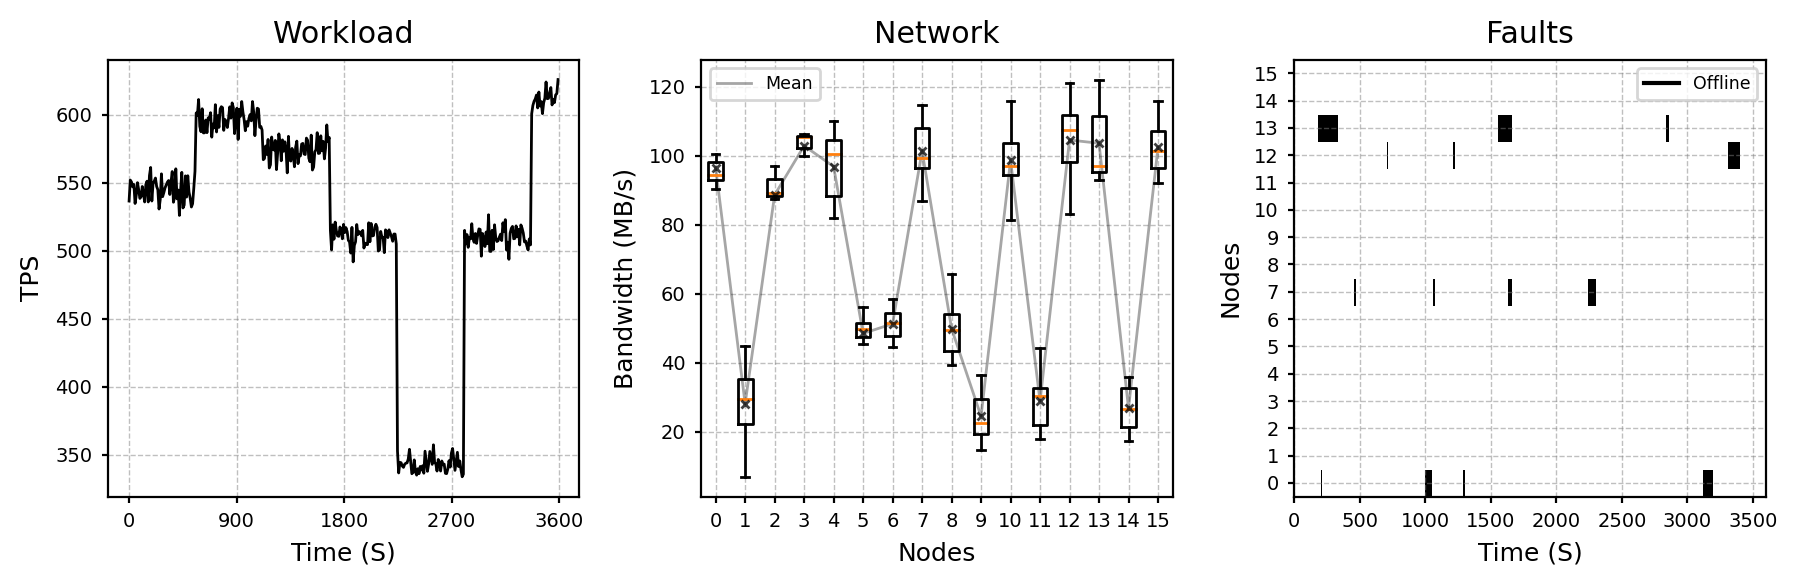

In [6]:
plot_scenario(nodes, duration, tps, network, faults)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


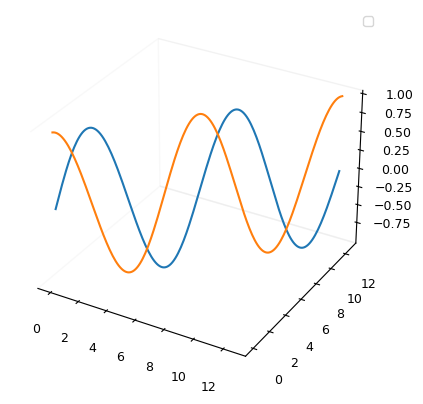

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [24]:
## FUN / Vector Fields

x = np.linspace(0,4*np.pi,200)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

line = ax.plot(x, x, np.sin(x))


# Customize 3D grid appearance
ax.grid(True)  # Show grid lines
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)  # Hide grid lines

# Customize tick appearance
ax.tick_params(axis='both', which='major', pad=8)
ax.tick_params(axis='both', which='minor', pad=8)

# Add a legend
ax.legend()

# Update the plot dynamically (for demonstration purposes)
for i in range(100):
    plt.draw()
    plt.pause(0.1)


plt.show()